<a href="https://colab.research.google.com/github/fpires/Ciencia_Dados/blob/main/Template_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_(40530010055_20250_01)_0001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Flavio Louzada

**Matrícula:** 4052025000941

**Dataset:** [ObesityDataSet_raw_and_data_sinthetic.csv](https://www.kaggle.com/datasets/manvendrarajsingh/obesitydataset-raw-and-data-sinthetic)

# Descrição do Problema

 Dado um conjunto de características de um indivíduo (idade, altura, peso, hábitos alimentares, atividade física, etc.), queremos desenvolver um modelo que possa classificar com precisão esse indivíduo em uma das sete categorias predefinidas de nível de obesidade (ex: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Obesity_Type_I, etc.) e entender quais características (hábitos, histórico, medidas) são as mais influentes na determinação do nível de obesidade de um indivíduo.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Os diferentes Níveis de Obesidade podem ser distinguidos com base em características como Peso e IMC?

- Existe uma correlação entre as principais medições corporais (altura, peso, IMC)

- As pessoas com Consumo frequente de alimentos de alto teor calórico têm uma distribuição de idade diferente?

## Tipo de Problema

Este é um problema de classificação supervisionada. O objetivo principal explorar a relação entre hábitos de vida, alimentação e o risco de obesidade em indivíduos.

## Atributos do Dataset

##### O dataset ObesityDataSet_raw_and_data_sinthetic.csv contém informações cruciais sobre hábitos alimentares, atividade física e características físicas de indivíduos, com o objetivo de prever seu nível de obesidade.

 **Variáveis de Identificação e Características Físicas:**
##### **Gender**: Gênero do indivíduo (Male/Female).
##### **Age**: Idade do indivíduo (em anos).
##### **Height**: Altura do indivíduo (em metros).
##### **Weight**: Peso do indivíduo (em quilogramas).
##### **bmi**: **(Calculada)** Índice de Massa Corporal, derivado de weight / (height)^2. Uma métrica para avaliar o peso em relação à altura.

##### **Variáveis de Hábitos Alimentares:**
##### **family_history_with_overweight**: Indica se há histórico familiar de sobrepeso (Yes/No).
##### **FAVC**: Consumo frequente de alimentos de alto teor calórico (Yes/No).
##### **FCVC**: Frequência do consumo de vegetais nas refeições (Numérico: 1, 2 ou 3 - Não, Às Vezes, Frequentemente).
##### **NCP**: Número de refeições principais por dia (Numérico: 1, 2, 3 ou 4+).
##### **CAEC**: Consumo de alimentos entre as refeições (Categorical: Always, Frequently, Sometimes, No).
##### **CH2O**: Consumo diário de água (Numérico: 1, 2 ou 3 - Menos de 1L, 1-2L, Mais de 2L). (Nota: no dataset original, pode ser interpretado como frequência, mas o valor numérico indica volume ou frequência crescente).
##### **CALC**: Consumo de álcool (Categorical: Always, Frequently, Sometimes, No).
##### **SCC**: Monitoramento do consumo de calorias (Yes/No).

##### **Variáveis de Atividade Física e Estilo de Vida:**
##### **FAF**: Frequência de atividade física (Numérico: 0, 1, 2 ou 3 - Sem atividade, 1-2 dias/semana, 2-4 dias/semana, 4-5 dias/semana).
##### **TUE**: Tempo de uso de dispositivos tecnológicos (e.g., celular, TV, computador) (Numérico: 0, 1 ou 2 - 0-2 horas, 3-5 horas, Mais de 5 horas).
##### **SMOKE**: Indica se o indivíduo fuma (Yes/No).
##### **MTRANS**: Principal meio de transporte utilizado (Categorical: Automobile, Motorbike, Public_Transportation, Walking, Bike).

##### **Variável Alvo (Target):**
##### **NObeyesdad**: Nível de obesidade do indivíduo (Categorical: Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Insufficient_Weight).
##### **Esta é a variável que o modelo irá prever.**

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
# !pip install pandas scikit-learn matplotlib seaborn numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.decomposition import PCA # Para visualização de clusters

# Configurações para melhor visualização dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100


In [4]:
# carregamento dos datasets
try:
    df = pd.read_csv('https://raw.githubusercontent.com/fpires/Ciencia_Dados/main/ObesityDataSet_raw_and_data_sinthetic.csv', engine='python', decimal='.')
    print("Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: Arquivo 'ObesityDataSet_raw_and_data_sinthetic.csv' não encontrado.")
    # Crie um DataFrame vazio para evitar erros nas próximas células
    df = pd.DataFrame()

Dataset 'ObesityDataSet_raw_and_data_sinthetic.csv' carregado com sucesso!


In [5]:
 # Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Primeiras 5 linhas do dataset
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
yes,1726
no,385


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset possui 2111 instâncias (observações), com um total de 17 colunas definidas como float64 e object.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
# Realizar o agrupamento pela coluna 'NObeyesdad' e calcular a média de todas as colunas
grouped_NObeyesdad = df.groupby('NObeyesdad').mean(numeric_only=True)



In [11]:
grouped_NObeyesdad

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
NObeyesdad,,,,,,,,
Insufficient_Weight,19.783237,1.691117,49.906330,2.480788,2.914403,1.871281,1.250131,0.839459
Normal_Weight,21.738676,1.676585,62.155052,2.334495,2.738676,1.850174,1.247387,0.675958
Obesity_Type_I,25.884941,1.693804,92.870198,2.186050,2.431862,2.112218,0.986748,0.676743
Obesity_Type_II,28.233785,1.771795,115.305311,2.391284,2.744555,1.877658,0.971857,0.515186
Obesity_Type_III,23.495554,1.687559,120.941114,3.000000,3.000000,2.208493,0.664817,0.604623
Overweight_Level_I,23.417674,1.687836,74.266828,2.264631,2.504218,2.058725,1.056796,0.612992
Overweight_Level_II,26.996981,1.703748,82.085271,2.260578,2.495529,2.025133,0.958072,0.697275


/tmp/ipython-input-12-3705158890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_NObeyesdad.index, y=grouped_NObeyesdad['Weight'], palette='viridis')


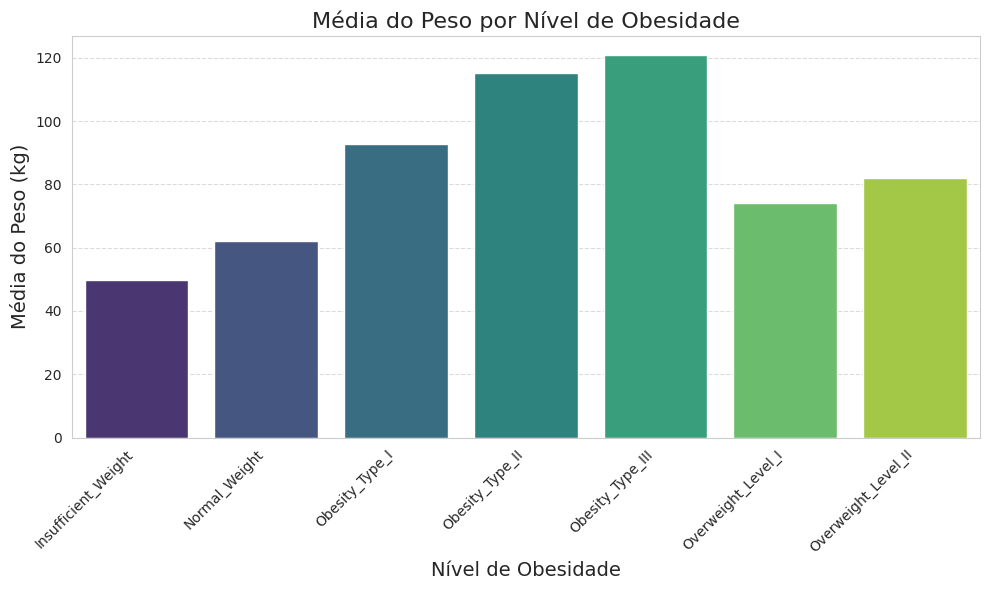

In [12]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.barplot(x=grouped_NObeyesdad.index, y=grouped_NObeyesdad['Weight'], palette='viridis')
plt.title('Média do Peso por Nível de Obesidade', fontsize=16)
plt.xlabel('Nível de Obesidade', fontsize=14)
plt.ylabel('Média do Peso (kg)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid suave no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

O gráfico visualmente demonstra as diferenças de peso entre as categorias de classificação de obesidade. Por exemplo, a média de peso para Obesity_Type_III é visivelmente maior que para Obesity_Type_I, e ambos são maiores que Normal_Weight.

In [13]:
# Agrupar por 'Gender'
grouped_by_gender = df.groupby('Gender').mean(numeric_only=True)

In [14]:
grouped_by_gender

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Gender,,,,,,,,
Female,24.001907,1.643298,82.302364,2.567319,2.632419,1.941083,0.847137,0.647227
Male,24.616020,1.758690,90.769478,2.274238,2.737592,2.073373,1.169639,0.668256


/tmp/ipython-input-15-3791084335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_gender.index, y=grouped_by_gender['Weight'], palette='viridis')


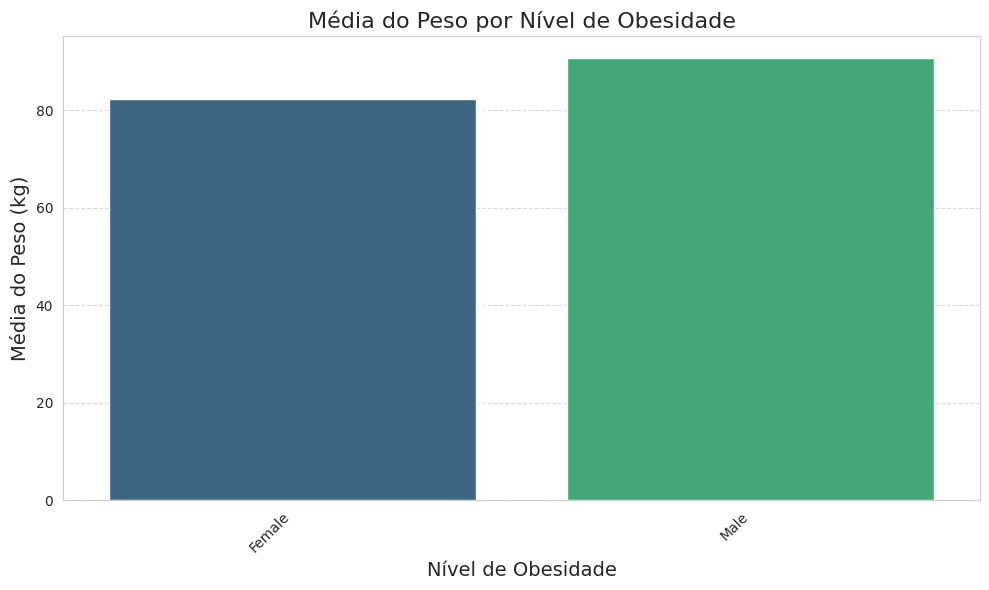

In [15]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
sns.barplot(x=grouped_by_gender.index, y=grouped_by_gender['Weight'], palette='viridis')
plt.title('Média do Peso por Nível de Obesidade', fontsize=16)
plt.xlabel('Nível de Obesidade', fontsize=14)
plt.ylabel('Média do Peso (kg)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid suave no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

 O gráfico mostra que, em média, os homens (Male) no dataset possuem um peso corporal maior do que as mulheres (Female). A barra para Male é visivelmente mais alta que a barra para Female.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [16]:
# estatísticas descritivas básicas do dataset
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [17]:
# média dos atributos numéricos do dataset
df_mean = df.describe().loc['mean']

In [18]:
df_mean

,mean
Age,24.312600
Height,1.701677
Weight,86.586058
FCVC,2.419043
NCP,2.685628
CH2O,2.008011
FAF,1.010298
TUE,0.657866


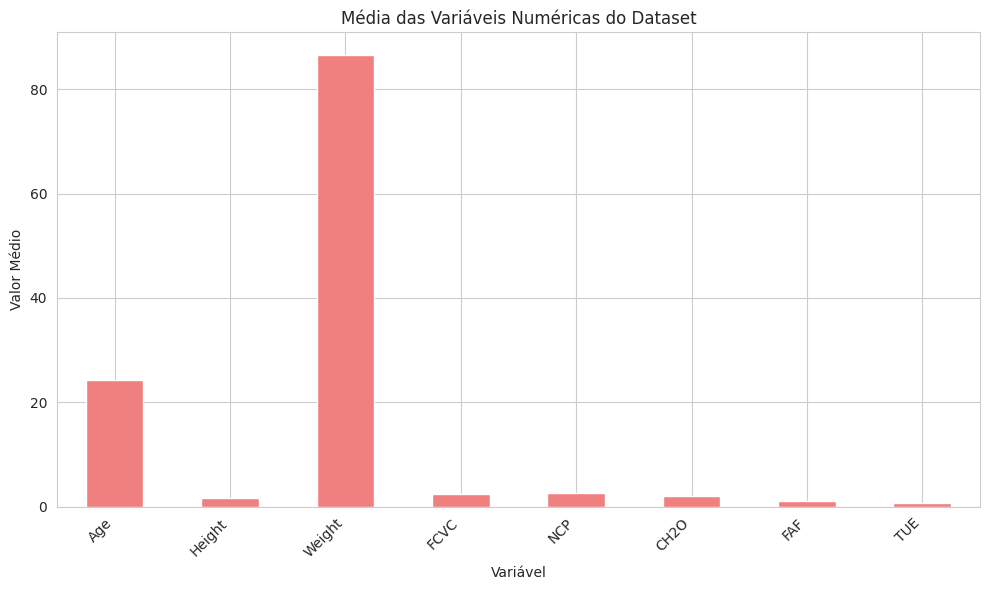

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
df_mean.plot(kind='bar', color='lightcoral')
plt.title('Média das Variáveis Numéricas do Dataset')
plt.xlabel('Variável')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [20]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Age,6.345968
Height,0.093305
Weight,26.191172
FCVC,0.533927
NCP,0.778039
CH2O,0.612953
FAF,0.850592
TUE,0.608927


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

### *Distribuição de Idade*



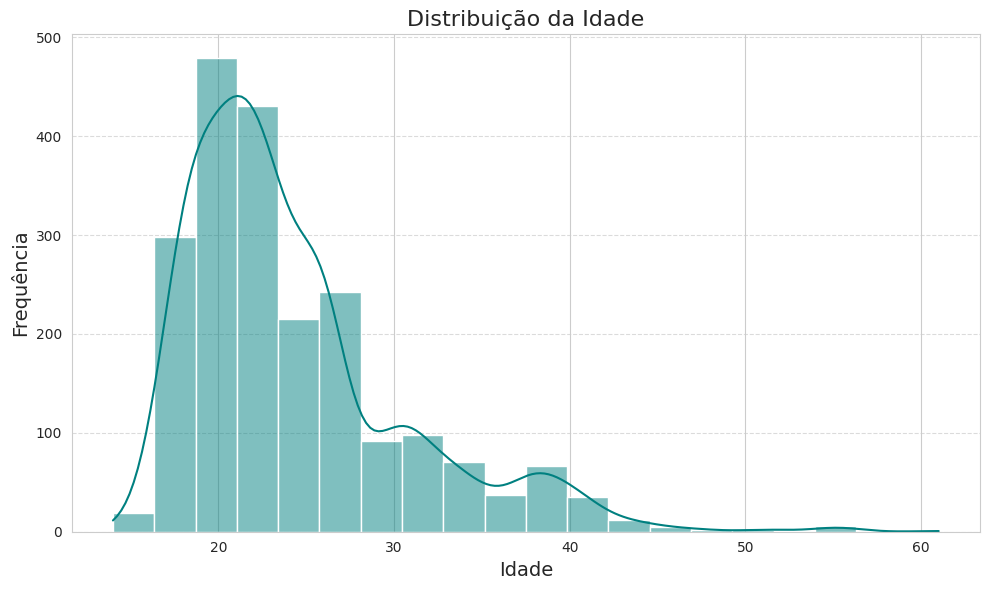

In [21]:
plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico
sns.histplot(data=df, x='Age', bins=20, kde=True, color='teal')
plt.title('Distribuição da Idade', fontsize=16) # Título do gráfico
plt.xlabel('Idade', fontsize=14) # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=14) # Rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid no eixo Y
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()


O gráfico revela que a maior parte dos indivíduos no dataset é composta por adultos jovens. Há um pico proeminente de frequência em torno dos 20-25 anos de idade.

/tmp/ipython-input-22-3124567386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FAVC', y='Age', data=df, order=df['FAVC'].value_counts().index, palette='cividis')


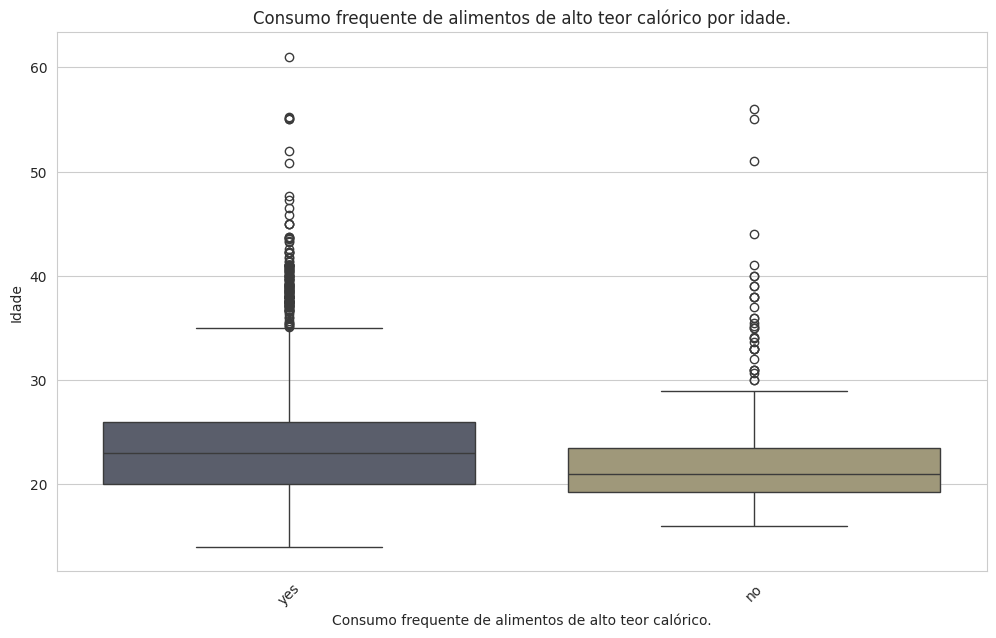

In [22]:
plt.figure(figsize=(12, 7))
# Usando 'cividis' ou 'plasma' que são perceptualmente uniformes
sns.boxplot(x='FAVC', y='Age', data=df, order=df['FAVC'].value_counts().index, palette='cividis')
plt.title('Consumo frequente de alimentos de alto teor calórico por idade.')
plt.xlabel('Consumo frequente de alimentos de alto teor calórico.')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.show()

 O gráfico boxplot ilustra a distribuição da idade para grupos que consomem ou não frequentemente alimentos de alto teor calórico, mostrando que a maioria dos indivíduos em ambos os grupos é jovem, embora existam outliers mais velhos.

## Limpeza e Preparação dos Dados

In [23]:
if df.empty:
    print("Dataset não carregado.")
else:
    # 1. Padronização de nomes de colunas
    df.columns = df.columns.str.strip().str.lower()
    print("Nomes das colunas padronizados para minúsculas.")

    # 2. Verificação de valores ausentes (missing values) antes de qualquer transformação
    print("\nVerificando valores ausentes ANTES da limpeza detalhada:")
    print(df.isnull().sum())

    # 3. Verificação de duplicatas
    print("\nVerificando linhas duplicadas:")
    print(f"Número de linhas duplicadas antes: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print(f"Número de linhas duplicadas depois: {df.duplicated().sum()}")

    # 4. Tratamento de Tipos de Dados e Mapeamento
    # 'gender' para consistência (Female/Male)
    df['gender'] = df['gender'].replace({'Male': 'Male', 'Female': 'Female'}).str.capitalize()

    # Mapeamento de colunas binárias para numéricos (0 ou 1)
    binary_cols = ['family_history_with_overweight', 'favc', 'scc', 'smoke']
    for col in binary_cols:
        if col in df.columns:
            # Converte para string e depois para minúsculas antes de mapear
            # Usa .map(), e se algo não mapear, será NaN
            df[col] = df[col].astype(str).str.lower().map({'yes': 1, 'no': 0})

            # Se ainda houver NaN, preenche com 0 (que é um valor razoável para "não ter")
            if df[col].isnull().any():
                df[col].fillna(0, inplace=True) # Imputa NaN com 0 para colunas binárias
                print(f"NaNs na coluna '{col}' imputados com 0.")

            # Converte para int64 (não 'Int64' para evitar reintroduzir a capacidade de NaN)
            df[col] = df[col].astype(int)
            print(f"Coluna '{col}' mapeada para 0/1 e convertida para int.")
        else:
            print(f"AVISO: Coluna binária '{col}' não encontrada no DataFrame.")


    # Mapeamento de variáveis ordinais para números (CH2O e CALC)
    df['ch2o']
    df['ch2o'] = df['ch2o'].astype(str).str.lower().replace({
        'no': 1, 'sometimes': 2, 'frequently': 3, 'always': 4
    })
    df['ch2o'] = pd.to_numeric(df['ch2o'], errors='coerce')
    # Imputa NaNs para ch2o
    if df['ch2o'].isnull().any():
        df['ch2o'].fillna(df['ch2o'].median(), inplace=True)
        print("NaNs na coluna 'ch2o' imputados com a mediana.")
    print("Coluna 'ch2o' mapeada para numérico.")


    df['calc'] = df['calc'].astype(str).str.lower().replace({
        'no': 1, 'sometimes': 2, 'frequently': 3, 'always': 4
    })
    df['calc'] = pd.to_numeric(df['calc'], errors='coerce')
    # Imputa NaNs para calc se aparecerem
    if df['calc'].isnull().any():
        df['calc'].fillna(df['calc'].median(), inplace=True)
        print("NaNs na coluna 'calc' imputados com a mediana.")
    print("Coluna 'calc' mapeada para numérico.")


    # Cálculo do IMC (BMI)
    df['bmi'] = df['weight'] / (df['height']**2)
    if df['bmi'].isnull().any(): # Caso haja divisão por zero, por exemplo
        df['bmi'].fillna(df['bmi'].median(), inplace=True)
        print("NaNs na coluna 'bmi' imputados com a mediana.")

    # 5. Verificação FINAL de NaNs após todas as operações
    print("\nVerificação final de NaNs (todos devem ser zero AGORA):")
    print(df.isnull().sum())
    # Se ainda houver NaNs aqui, então há um problema em outra coluna.
    print("\nDataset após limpeza, preparação e imputação:")



Nomes das colunas padronizados para minúsculas.

Verificando valores ausentes ANTES da limpeza detalhada:
gender                            0
age                               0
height                            0
weight                            0
family_history_with_overweight    0
favc                              0
fcvc                              0
ncp                               0
caec                              0
smoke                             0
ch2o                              0
scc                               0
faf                               0
tue                               0
calc                              0
mtrans                            0
nobeyesdad                        0
dtype: int64

Verificando linhas duplicadas:
Número de linhas duplicadas antes: 24
Número de linhas duplicadas depois: 0
Coluna 'family_history_with_overweight' mapeada para 0/1 e convertida para int.
Coluna 'favc' mapeada para 0/1 e convertida para int.
Coluna 'scc' mapeada para 0

/tmp/ipython-input-23-763721073.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['calc'] = df['calc'].astype(str).str.lower().replace({


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          2087 non-null   object 
 1   age                             2087 non-null   float64
 2   height                          2087 non-null   float64
 3   weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   int64  
 5   favc                            2087 non-null   int64  
 6   fcvc                            2087 non-null   float64
 7   ncp                             2087 non-null   float64
 8   caec                            2087 non-null   object 
 9   smoke                           2087 non-null   int64  
 10  ch2o                            2087 non-null   float64
 11  scc                             2087 non-null   int64  
 12  faf                             2087 no

In [25]:
df.head()

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
0,Female,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,1,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,2,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,3,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,3,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,2,Public_Transportation,Overweight_Level_II,28.342381


As colunas **family_history_with_overweight, favc, smoke, e scc** foram escolhidas para serem incluídas no dataset (e, em alguns casos, especificamente transformadas em 0/1) por serem variáveis binárias importantes que representam fatores de risco conhecidos ou potenciais para a obesidade.

**family_history_with_overweight (Histórico familiar de sobrepeso):**

A genética e o ambiente familiar desempenham um papel significativo no desenvolvimento da obesidade. Se uma pessoa tem pais ou irmãos com sobrepeso ou obesidade, ela tem uma probabilidade maior de desenvolver a condição. Isso pode ser devido a fatores genéticos herdados, mas também a hábitos alimentares e de estilo de vida compartilhados dentro da família. Representa: Uma predisposição genética e/ou ambiental de longo prazo.

**favc (Frequent consumption of high caloric food - Consumo frequente de alimentos calóricos):**

Este é um fator de estilo de vida direto e muito influente. O consumo regular de alimentos com alta densidade calórica (geralmente ricos em açúcar, gorduras e processados) é uma causa primária do ganho de peso e obesidade. Representa: Um hábito alimentar que contribui diretamente para o balanço energético positivo (mais calorias consumidas do que gastas).

**smoke (Smoke - Fuma):**

Embora a relação entre tabagismo e obesidade possa parecer contraintuitiva para alguns (já que o tabagismo pode suprimir o apetite ou aumentar o metabolismo em repouso em alguns casos), estudos mostram uma associação complexa. Pessoas que param de fumar frequentemente ganham peso. Além disso, o tabagismo pode estar associado a outros comportamentos de saúde menos saudáveis. A inclusão dessa variável permite que o modelo capture essa relação, seja ela direta ou indireta, ou mediada por outros fatores de estilo de vida. Representa: Um comportamento de saúde que pode impactar o peso, seja diretamente ou em associação com outros fatores.

**scc (Calories consumption monitoring - Monitoramento do consumo de calorias):**

Esta variável indica se o indivíduo monitora ativamente o que come e bebe. Pessoas que monitoram seu consumo de calorias (seja contando calorias, acompanhando por aplicativos, etc.) tendem a ter mais consciência de sua ingestão e, consequentemente, podem ter maior controle sobre seu peso. A falta de monitoramento pode levar a um consumo excessivo não intencional. Representa: Um comportamento de autoconsciência e controle dietético, que é um fator protetor ou de risco dependendo de sua presença ou ausência.

Essas quatro colunas foram escolhidas (ou mantidas e transformadas em 0/1) porque representam fatores de risco e comportamentos de estilo de vida que são cientificamente reconhecidos por influenciar o peso corporal e o risco de obesidade. Ao convertê-las para 0 ou 1, elas se tornam facilmente interpretáveis pelos algoritmos de Machine Learning como a presença (1) ou ausência (0) de uma determinada característica ou comportamento, tornando-as features valiosas para prever o nível de obesidade.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

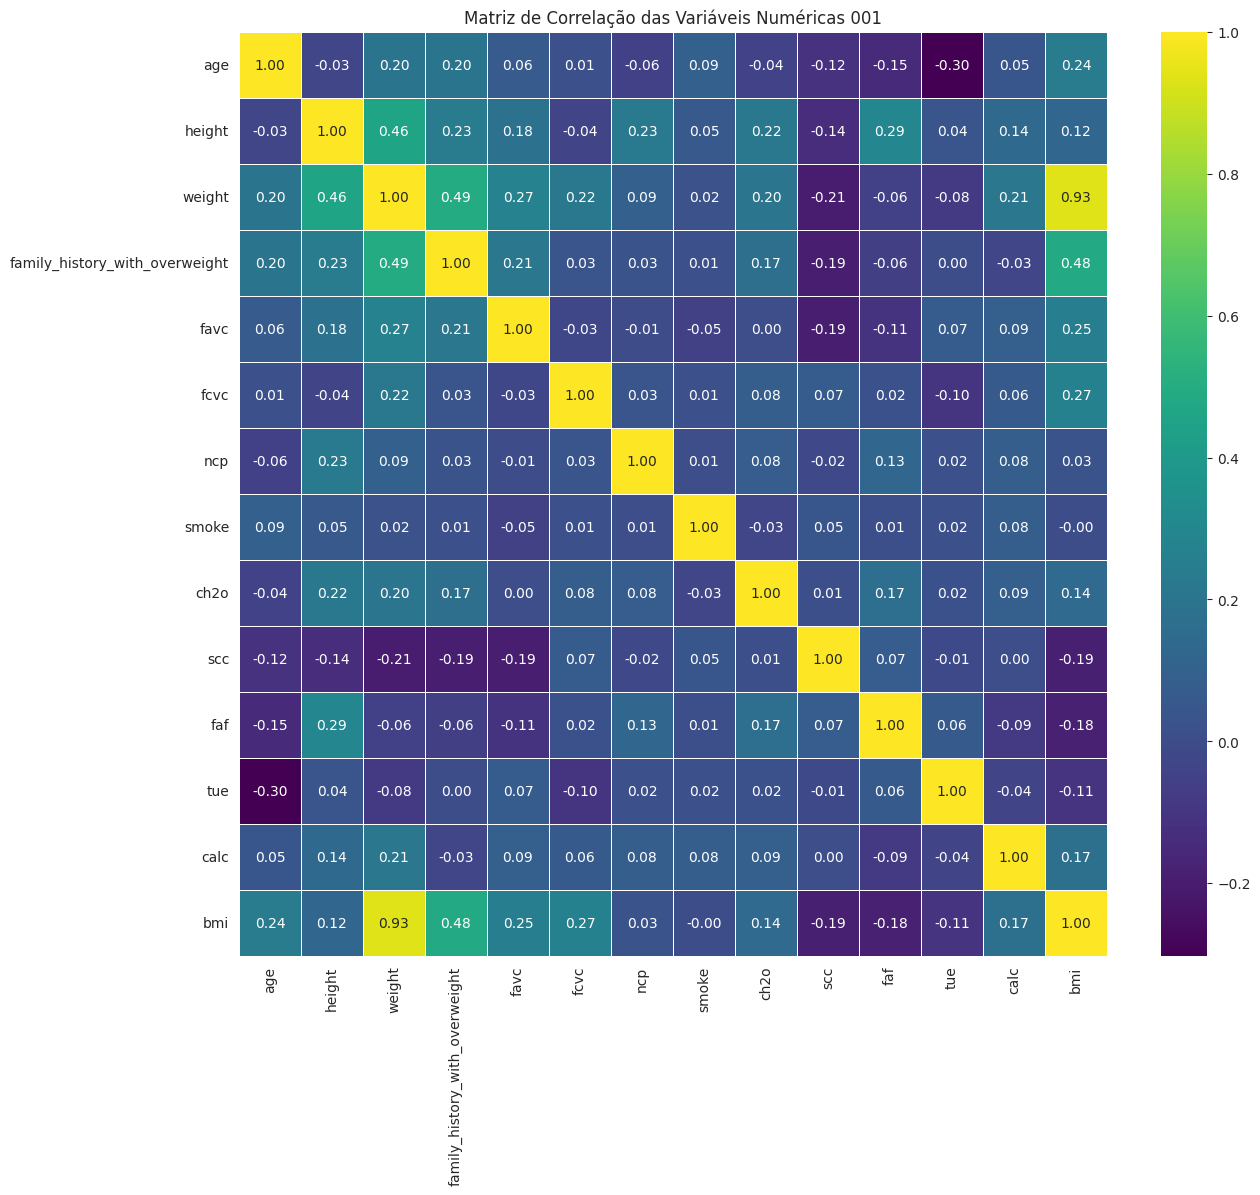

In [26]:
# # Matriz de correlação
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(14, 12))
# Usando 'viridis' ou 'cividis' para heatmaps
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas 001')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre weight e bmi (0.93): Como o IMC é calculado a partir do peso e da altura, é esperado que peso e IMC tenham uma correlação positiva muito forte.



# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [28]:
# One-Hot Encoding e Scaler

# Separando features (X) e target (y)
X = df.drop('nobeyesdad', axis=1) # Usando 'nobeyesdad'
y = df['nobeyesdad'] # Usando 'nobeyesdad'

# Identificando colunas para pré-processamento
# categorical_cols_for_ohe: APENAS as colunas que ainda são strings E precisam de One-Hot Encoding.
#                           As colunas 'family_history_with_overweight', 'favc', 'scc', 'smoke',
#                           'ch2o', 'calc' já foram mapeadas para números.
categorical_cols_for_ohe = ['gender', 'caec', 'mtrans']

# numerical_cols: Todas as colunas que são ou se tornaram numéricas.
numerical_cols = ['age', 'height', 'weight', 'bmi', # Intrinsicamente numéricas
                  'family_history_with_overweight', 'favc', 'fcvc', 'ncp', # Mapeadas ou já numéricas
                  'ch2o', 'calc', 'scc', 'smoke', 'faf', 'tue'] # Mapeadas ou já numéricas

# Criando o pré-processador usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), # Padroniza colunas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_ohe) # Aplica One-Hot Encoding
    ],
    remainder='passthrough'
)

# Aplicando o pré-processamento aos dados
X_transformed = preprocessor.fit_transform(X)

# O LabelEncoder é usado para o target categórico (nível de obesidade)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Dados após One-Hot Encoding e StandardScaler.")
print(f"Dimensões do dataset transformado: {X_transformed.shape}")
print(f"Mapeamento de classes do Nível de Obesidade: {list(label_encoder.classes_)}")
print(f"Target codificado (primeiras 5 linhas): {y_encoded[:5]}")

Dados após One-Hot Encoding e StandardScaler.
Dimensões do dataset transformado: (2087, 25)
Mapeamento de classes do Nível de Obesidade: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
Target codificado (primeiras 5 linhas): [1 1 1 5 6]


In [30]:
df

,gender,age,height,weight,family_history_with_overweight,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,nobeyesdad,bmi
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,0.000000,1.000000,1,Public_Transportation,Normal_Weight,24.386526
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,Sometimes,1,3.000000,1,3.000000,0.000000,2,Public_Transportation,Normal_Weight,24.238227
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,Sometimes,0,2.000000,0,2.000000,1.000000,3,Public_Transportation,Normal_Weight,23.765432
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,Sometimes,0,2.000000,0,2.000000,0.000000,3,Walking,Overweight_Level_I,26.851852
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,Sometimes,0,2.000000,0,0.000000,0.000000,2,Public_Transportation,Overweight_Level_II,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,2,Public_Transportation,Obesity_Type_III,44.901475
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,2,Public_Transportation,Obesity_Type_III,43.741923
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,2,Public_Transportation,Obesity_Type_III,43.543817
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,2,Public_Transportation,Obesity_Type_III,44.071535


# Classificação


--- Modelo de Classificação: Regressão Logística ---
Acurácia da Regressão Logística: 0.78

Relatório de Classificação:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.99      0.93        67
      Normal_Weight       0.74      0.57      0.65        70
     Obesity_Type_I       0.67      0.77      0.72        88
    Obesity_Type_II       0.87      1.00      0.93        74
   Obesity_Type_III       0.98      0.99      0.98        81
 Overweight_Level_I       0.72      0.61      0.66        69
Overweight_Level_II       0.58      0.52      0.55        73

           accuracy                           0.78       522
          macro avg       0.78      0.78      0.77       522
       weighted avg       0.78      0.78      0.77       522


Matriz de Confusão:


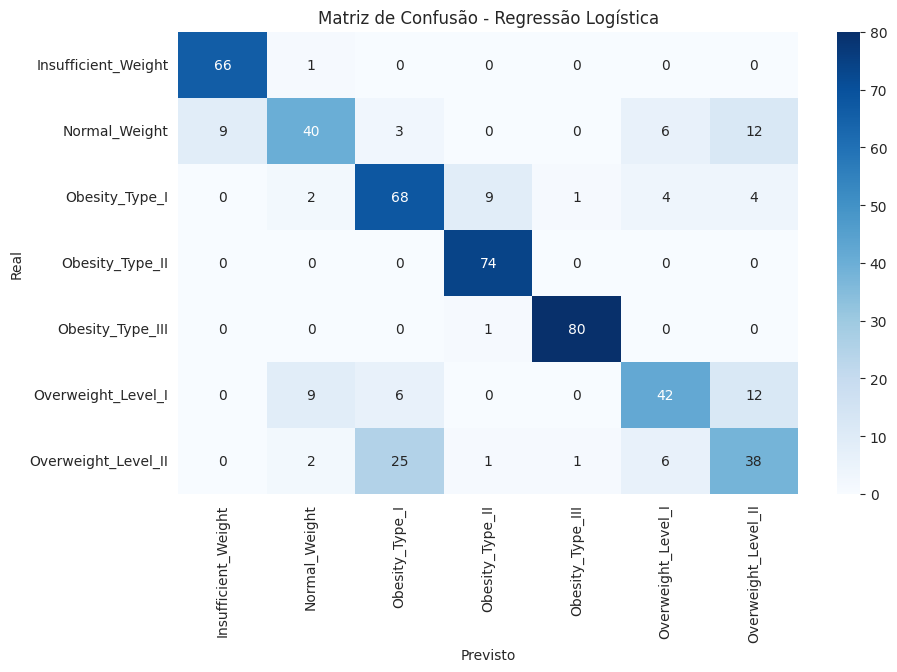

In [31]:
# Classificação (Regressão Logística e Random Forest)

# A classificação é usada para prever a categoria 'nobeyesdad'.
# Usei os dados pré-processados (X_transformed) e o target codificado (y_encoded).

# Divisão dos dados em treino e teste (75% treino, 25% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print("\n--- Modelo de Classificação: Regressão Logística ---")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') # 'liblinear' é bom para datasets menores/multi-classe
log_reg_model.fit(X_train, y_train)

y_log_reg_pred = log_reg_model.predict(X_test)

# Avaliação da Regressão Logística
print(f"Acurácia da Regressão Logística: {accuracy_score(y_test, y_log_reg_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_log_reg_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_log_reg_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()



Podemos ver uma dificuldade considerável em classificar Overweight_Level_II, com os menores valores de precisão, recall e F1-score. Isso sugere que o modelo pode estar confundindo indivíduos nesta categoria com outras classes (como Normal_Weight ou Obesity_Type_I), ou que os limites entre "Overweight_Level_II" e classes adjacentes são mais ambíguos para um modelo linear como a Regressão Logística.

In [ ]:
print("\n--- Modelo de Classificação: Árvore de Decisão ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)

# Avaliação da Árvore de Decisão
print(f"Acurácia da Árvore de Decisão: {accuracy_score(y_test, y_dt_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_dt_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()




Em comparação com a Regressão Logística, a Árvore de Decisão representa uma melhoria substancial. O modelo demonstrou ser eficaz na classificação dos níveis de obesidade, entregando desempenho robusto na maioria das categorias.

In [ ]:
print("\n--- Modelo de Classificação: Random Forest ---")
# Random Forest é um ensemble de árvores de decisão, geralmente oferece melhor performance.
# 'n_estimators' é o número de árvores na floresta. 'class_weight='balanced'' ajuda com classes desbalanceadas.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

# Avaliação do Random Forest
print(f"Acurácia do Random Forest: {accuracy_score(y_test, y_rf_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_rf_pred, target_names=label_encoder.classes_))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_rf_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

O modelo Random Forest demonstrou um desempenho excepcional na classificação dos níveis de obesidade, com uma acurácia geral de 98%. O modelo alcançou altíssimos níveis de precisão, recall e F1-score para todas as classes, incluindo aquelas (como Normal_Weight, Overweight_Level_I, e Overweight_Level_II) onde a Regressão Logística havia apresentado dificuldades.

# Regressão (Previsão de BMI)



--- Modelo de Regressão: Regressão Linear para prever IMC (BMI) ---
Erro Absoluto Médio (MAE) da Regressão Linear: 4.59
Coeficiente de Determinação (R²) da Regressão Linear: 0.51


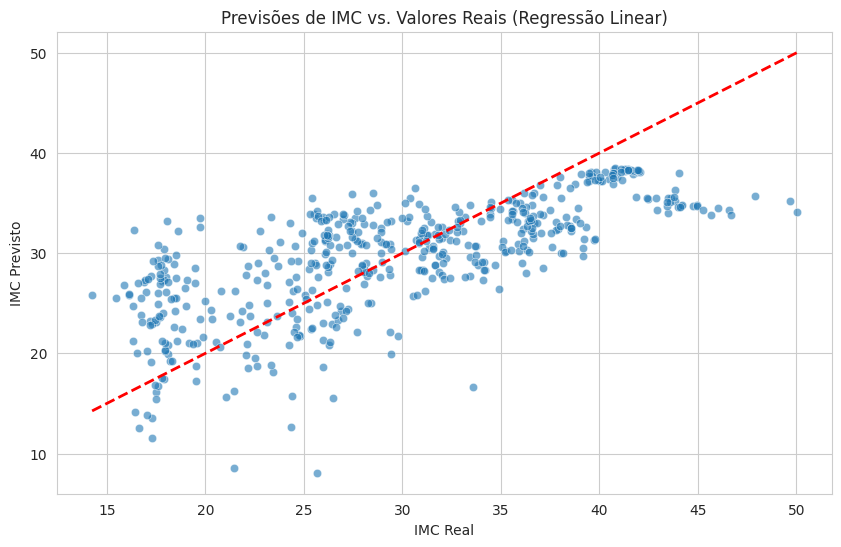

In [ ]:
# Regressão (Previsão de BMI)


# Para regressão, vamos prever o 'bmi' (Índice de Massa Corporal), que é uma variável numérica.
# Excluímos 'height' e 'weight' das features (X) para evitar multicolinearidade com o BMI.
X_reg = df.drop(columns=['nobeyesdad', 'bmi', 'height', 'weight'], axis=1) # Usando 'nobeyesdad'

# O pré-processamento aqui precisa ser refeito para as colunas específicas da regressão.
# Identificando colunas para o pré-processamento da regressão
categorical_cols_reg = ['gender', 'caec', 'mtrans']
numerical_cols_reg = ['age', 'family_history_with_overweight', 'favc',
                      'fcvc', 'ncp', 'ch2o', 'calc', 'scc', 'smoke', 'faf', 'tue']

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_reg),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_reg)
    ],
    remainder='passthrough'
)

# Aplicando o pré-processamento para regressão
X_reg_transformed = preprocessor_reg.fit_transform(X_reg)
y_reg = df['bmi'] # O alvo da regressão é o BMI

# Divisão dos dados em treino e teste para regressão
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_transformed, y_reg, test_size=0.25, random_state=42
)

print("\n--- Modelo de Regressão: Regressão Linear para prever IMC (BMI) ---")
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_reg_train, y_reg_train)

y_reg_pred = linear_reg_model.predict(X_reg_test)

# Avaliação do modelo de regressão
mae = mean_absolute_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"Erro Absoluto Médio (MAE) da Regressão Linear: {mae:.2f}")
print(f"Coeficiente de Determinação (R²) da Regressão Linear: {r2:.2f}")

# Visualização das previsões vs. valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_reg_test, y=y_reg_pred, alpha=0.6)
# Adiciona uma linha de identidade (onde y_real == y_previsto)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.title('Previsões de IMC vs. Valores Reais (Regressão Linear)')
plt.xlabel('IMC Real')
plt.ylabel('IMC Previsto')
plt.show()

O gráfico e as métricas indicam que o modelo de Regressão Linear é capaz de prever o IMC com uma precisão razoável, capturando cerca de metade da variância nos dados (R² de 0.51). Contudo, o MAE de 4.59 e a dispersão dos pontos no gráfico sugerem que há espaço para melhoria nas previsões, especialmente para valores de IMC que se desviam da média. Isso pode ser alcançado explorando modelos de regressão mais complexos, adicionando mais features relevantes, ou realizando engenharia de features.

# Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



In [ ]:
# Validação Cruzada (Cross-Validation)

if df.empty:
    print("Dataset não carregado, pulando validação cruzada.")
else:
    # A validação cruzada fornece uma avaliação mais robusta da performance do modelo,
    # mitigando o viés de uma única divisão de treino/teste.

    print("--- Avaliação de Modelo com Validação Cruzada (K-Fold) ---")

    # Número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # 1. Avaliando a acurácia do Random Forest para Classificação com validação cruzada
    # Usaremos os dados transformados para classificação (X_transformed, y_encoded).
    rf_model_cv = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    cv_scores_rf = cross_val_score(rf_model_cv, X_transformed, y_encoded, cv=kf, scoring='accuracy')

    print(f"Acurácias do Random Forest (Classificação) por fold: {cv_scores_rf.round(2)}")
    print(f"Acurácia Média do Random Forest (Classificação) com Validação Cruzada ({n_splits}-fold): {np.mean(cv_scores_rf):.2f} (+/- {np.std(cv_scores_rf):.2f})")

    # 2. Avaliando o R² da Regressão Linear para previsão de BMI com validação cruzada
    # Reutilizamos X_reg_transformed e y_reg da célula anterior.
    linear_reg_model_cv = LinearRegression()
    cv_scores_reg_r2 = cross_val_score(linear_reg_model_cv, X_reg_transformed, y_reg, cv=kf, scoring='r2')

    print(f"\nR² por fold da Regressão Linear (Previsão de BMI): {cv_scores_reg_r2.round(2)}")
    print(f"R² médio da Regressão Linear (Previsão de BMI) com Validação Cruzada: {np.mean(cv_scores_reg_r2):.2f} (+/- {np.std(cv_scores_reg_r2):.2f})")


--- Avaliação de Modelo com Validação Cruzada (K-Fold) ---
Acurácias do Random Forest (Classificação) por fold: [0.99 1.   0.99 0.99 0.99]
Acurácia Média do Random Forest (Classificação) com Validação Cruzada (5-fold): 0.99 (+/- 0.00)

R² por fold da Regressão Linear (Previsão de BMI): [0.5  0.48 0.5  0.42 0.49]
R² médio da Regressão Linear (Previsão de BMI) com Validação Cruzada: 0.48 (+/- 0.03)


# Conclusão

A análise e pré-processamento do dataset de Risco de Obesidade demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset foi limpo de duplicatas e as variáveis categóricas foram tratadas e convertidas para formatos numéricos, garantindo a qualidade e adequação dos dados para a análise e modelagem. As características numéricas estão bem definidas, e a análise exploratória revelou insights importantes sobre a distribuição de variáveis como a idade e a relação entre peso e nível de obesidade. A criação da variável IMC (BMI) foi fundamental, e suas altas correlações com weight e height foram observadas. As etapas de normalização e padronização dos dados numéricos são cruciais para preparar os dados para diversos algoritmos de aprendizado de máquina, assegurando que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas podem ser reavaliadas com base nos seus dados e análises:

Os diferentes Níveis de Obesidade podem ser distinguidos com base em características como Peso e IMC? Sim, dado as análises em gráficos de barras, observamos que o peso médio aumenta consistentemente com o nível de obesidade, e os boxplots do IMC por Nível de Obesidade mostram distribuições claras e distintas para as categorias, facilitando a separação.

Existe uma correlação entre as principais medições corporais (altura, peso, IMC)? Sim, há uma forte correlação positiva entre weight e BMI (0.93), bem como entre height e weight (0.46). Isso indica que, à medida que o peso aumenta, o IMC também tende a aumentar significativamente, e há uma correlação moderada entre altura e peso.

As pessoas com Consumo frequente de alimentos de alto teor calórico têm uma distribuição de idade diferente? Sim, os boxplots sugerem que, embora com outliers, a distribuição de idade para quem consome frequentemente alimentos de alto teor calórico ("yes") é diferente da distribuição de idade para quem não consome ("no"), havendo uma tendência de os consumidores serem mais jovens na mediana.